<a href="https://colab.research.google.com/github/Mano1498/Customer_Segmentation_Project/blob/main/Customer_segment(Kmeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [82]:
retail = pd.read_csv("/content/drive/MyDrive/DataSets/RFM2OnlineRetail.csv")

In [83]:
retail.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel
0,12820,2,59,942,1,2,2,5,Platinum
1,12821,213,6,93,4,4,4,12,Bronze
2,12822,70,46,949,3,2,2,7,Gold
3,12823,74,5,1760,3,4,1,8,Silver
4,12824,59,25,397,3,3,3,9,Silver


In [84]:
features = ["Recency","Frequency","Monetary"]

In [85]:
data = retail[features].copy()

In [86]:
data.describe()

,Recency,Frequency,Monetary
count,3179.000000,3179.000000,3179.000000
mean,92.512425,48.878893,742.894621
std,89.960711,45.965012,634.685987
min,0.000000,1.000000,4.000000
25%,22.000000,15.000000,267.000000
50%,58.000000,33.000000,530.000000
75%,149.500000,69.000000,1043.000000
max,329.000000,228.000000,2781.000000


<Axes: xlabel='Recency', ylabel='Count'>

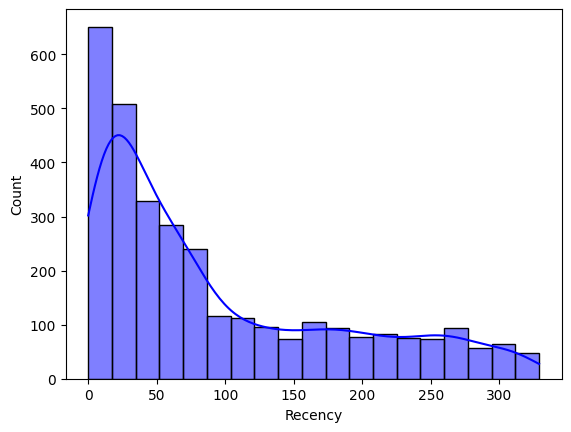

In [87]:
sns.histplot(data.Recency,kde=True,color="blue")

<Axes: xlabel='Frequency', ylabel='Count'>

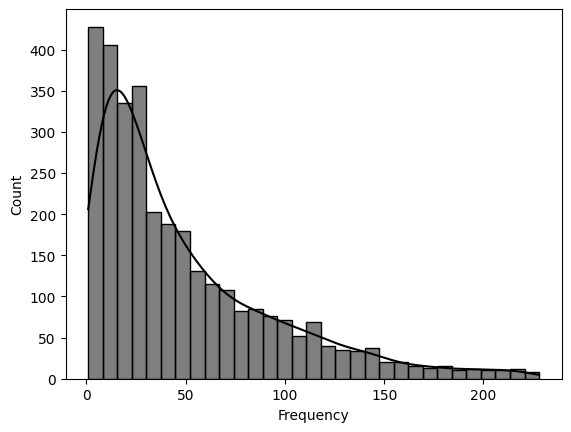

In [88]:
sns.histplot(data.Frequency,kde=True,color="black")

<Axes: xlabel='Monetary', ylabel='Count'>

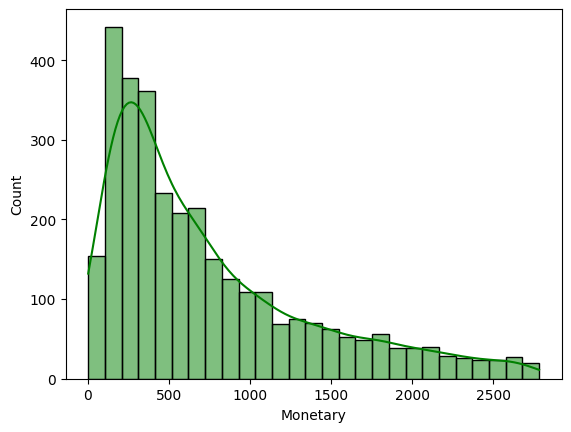

In [89]:
sns.histplot(data.Monetary,kde=True,color="green")

In [90]:
data["Recency"].replace(0,1,inplace=True)

In [91]:
data["Recency"].min()

1

Lambda value : 0.23921326158697623


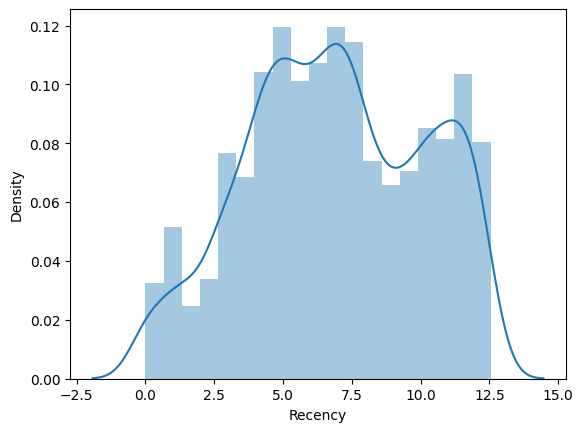

In [92]:
data["Recency"], lam_r = stats.boxcox(data["Recency"])
sns.distplot(data.Recency)
print("Lambda value :",lam_r)

Lambda value : 0.21730579181694484


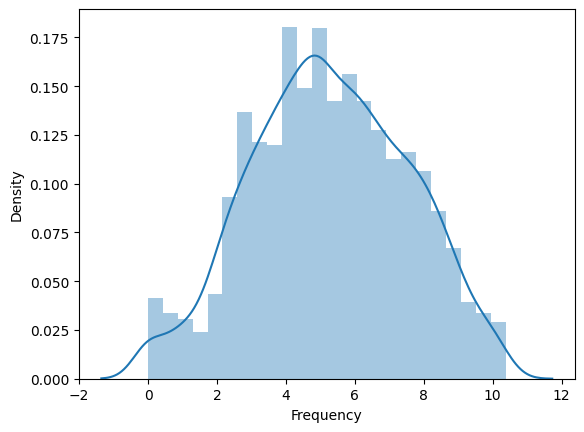

In [93]:
data["Frequency"], lam_f = stats.boxcox(data["Frequency"])
sns.distplot(data.Frequency)
print("Lambda value :",lam_f)

Lambda value : 0.1616365476662178


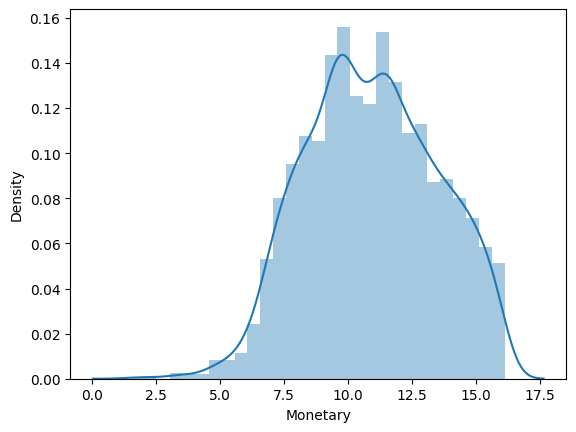

In [94]:
data["Monetary"], lam_m = stats.boxcox(data["Monetary"])
sns.distplot(data.Monetary)
print("Lambda value :",lam_m)

In [95]:
scl = StandardScaler()
c = ["Recency","Frequency","Monetary"]
data[c] = scl.fit_transform(data[c])

In [96]:
data.head()

,Recency,Frequency,Monetary
0,-1.913866,0.565076,0.631249
1,1.241106,-1.364817,-1.661527
2,0.144894,0.305520,0.640043
3,0.192992,-1.481350,1.412013
4,0.000871,-0.274070,-0.326043


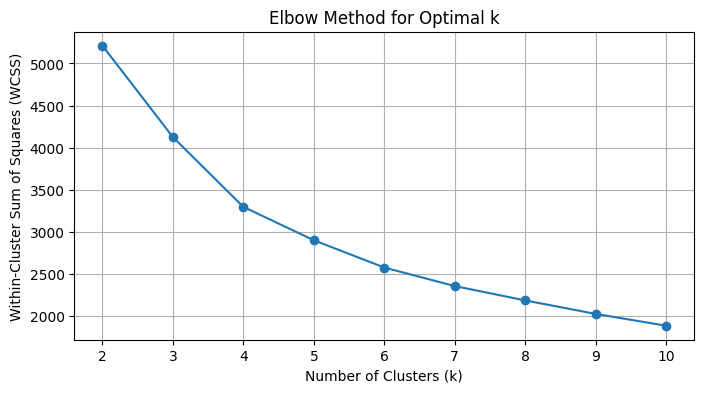

In [97]:
k_values = range(2, 11)
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [98]:
wcss

[5211.012501124402,
 4125.669277085845,
 3297.521291475096,
 2901.2646532591134,
 2577.415829249857,
 2357.336256919329,
 2187.085349946219,
 2026.6524971709473,
 1886.5097503673255]

In [107]:
kmeans = KMeans(n_clusters=5,max_iter= 100)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=5)

In [109]:
prd = kmeans.predict(data)

In [110]:
prd

array([3, 0, 4, ..., 0, 2, 1], dtype=int32)

In [111]:
retail["Cluster_ID"] = prd

In [114]:
retail.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel,Cluster_ID
0,12820,2,59,942,1,2,2,5,Platinum,3
1,12821,213,6,93,4,4,4,12,Bronze,0
2,12822,70,46,949,3,2,2,7,Gold,4
3,12823,74,5,1760,3,4,1,8,Silver,4
4,12824,59,25,397,3,3,3,9,Silver,2


<Axes: xlabel='Cluster_ID', ylabel='Recency'>

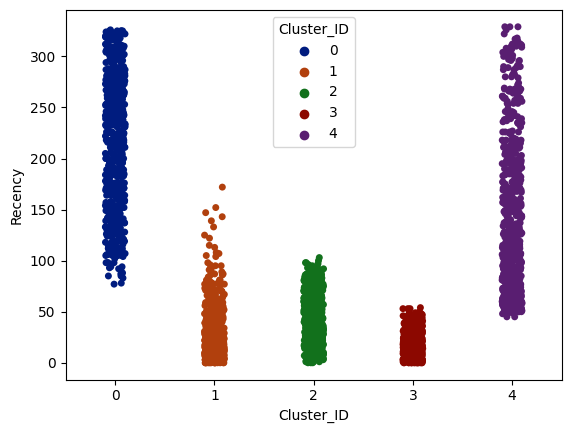

In [123]:
sns.stripplot(x="Cluster_ID",y="Recency",data=retail,hue="Cluster_ID", palette="dark")

<Axes: xlabel='Cluster_ID', ylabel='Frequency'>

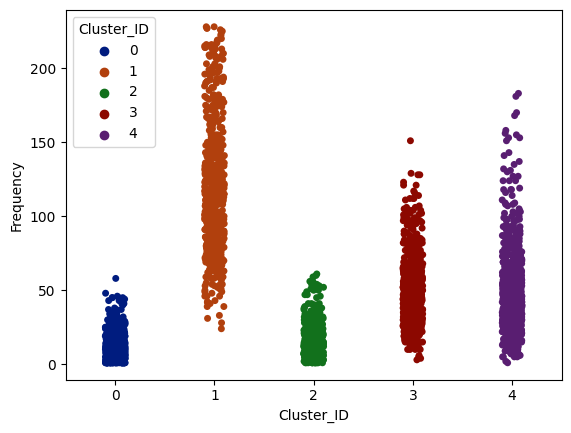

In [128]:
sns.stripplot(x="Cluster_ID",y="Frequency",data=retail,hue="Cluster_ID", palette="dark")

<Axes: xlabel='Cluster_ID', ylabel='Monetary'>

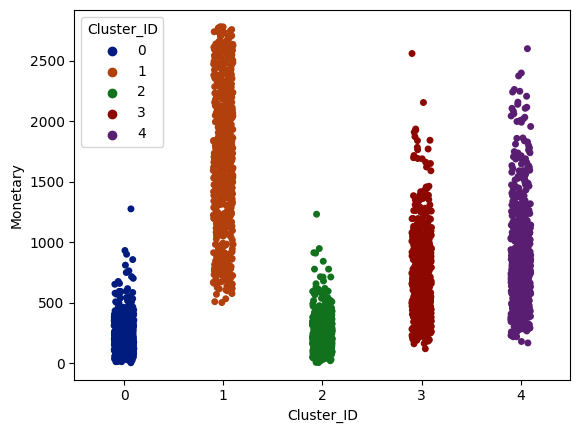

In [129]:
sns.stripplot(x="Cluster_ID",y="Monetary",data=retail,hue="Cluster_ID", palette="dark")

In [136]:
retail[kmeans.labels_ == 1][["CustomerID","LoyaltyLevel"] + features]

,CustomerID,LoyaltyLevel,Recency,Frequency,Monetary
5,12826,Platinum,2,91,1475
12,12836,Platinum,58,175,2613
14,12838,Platinum,33,123,683
15,12840,Platinum,143,113,2727
17,12843,Platinum,65,103,1702
...,...,...,...,...,...
3161,18257,Platinum,38,118,2338
3162,18259,Platinum,24,42,2339
3163,18260,Gold,172,134,2643
3166,18263,Platinum,25,61,1213


In [137]:
retail.groupby("Cluster_ID")["LoyaltyLevel"].value_counts()

Cluster_ID  LoyaltyLevel
0           Bronze          616
            Silver           28
1           Platinum        605
            Gold             13
2           Silver          356
            Bronze          215
            Gold             45
3           Gold            304
            Platinum        248
            Silver           27
4           Gold            320
            Silver          301
            Bronze           55
            Platinum         46
Name: LoyaltyLevel, dtype: int64